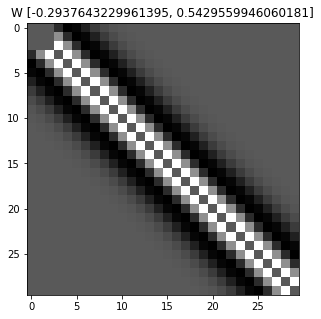

epoch  1


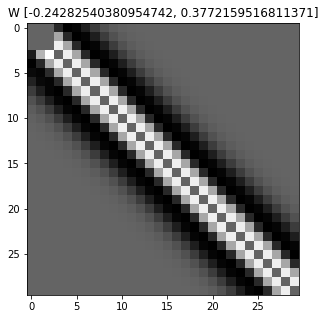

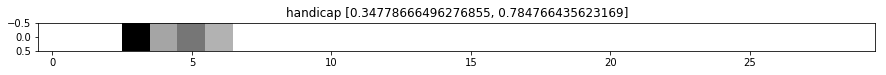

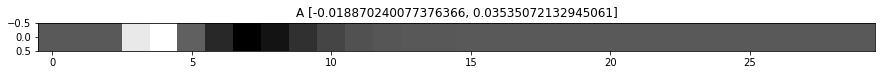

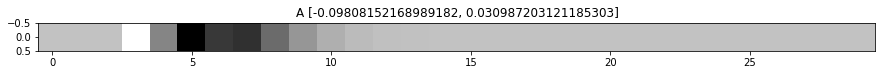

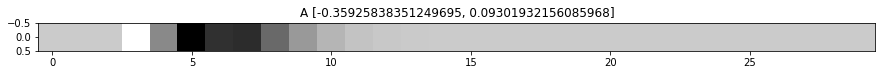

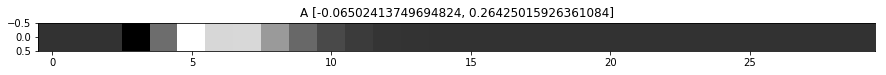

epoch  1001


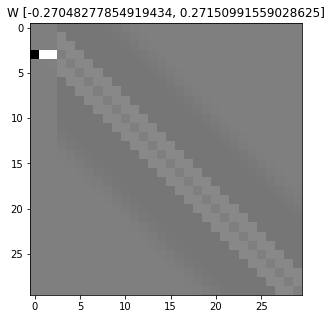

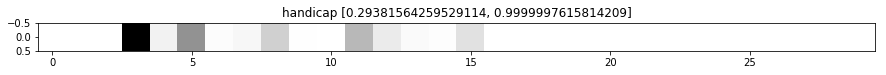

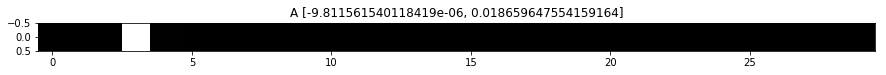

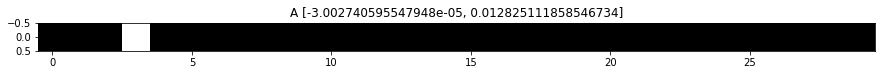

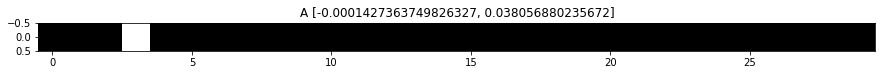

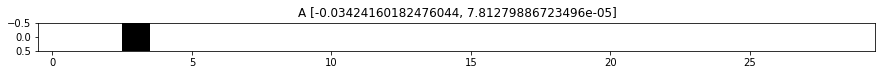

epoch  2001


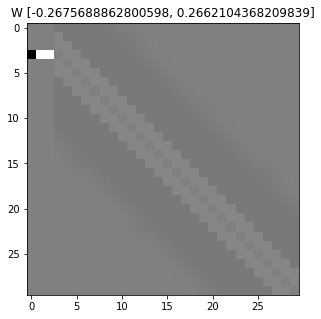

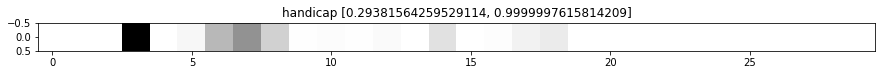

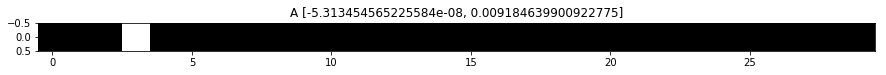

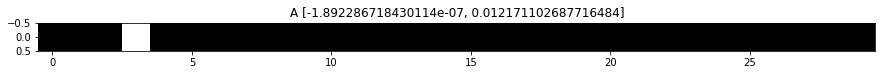

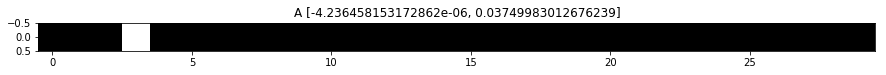

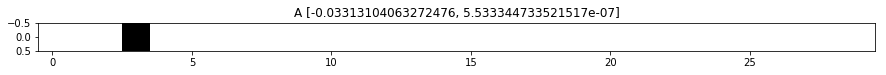

epoch  3001


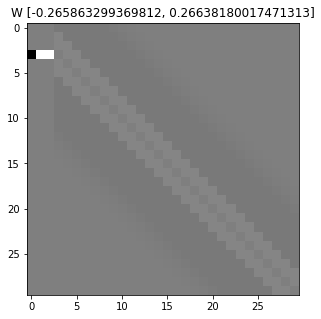

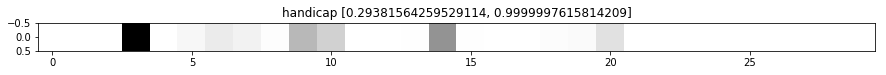

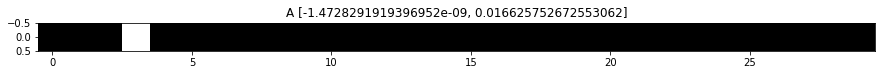

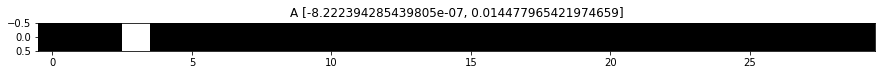

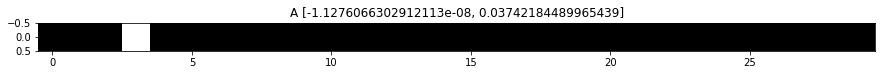

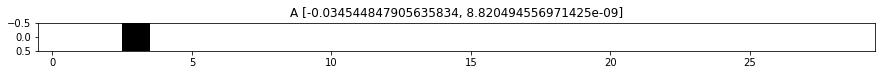

epoch  4001


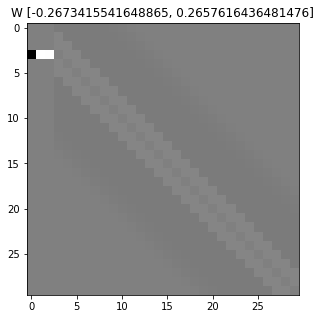

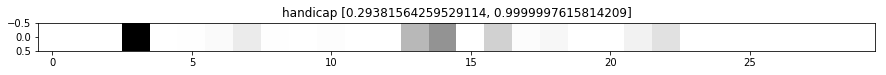

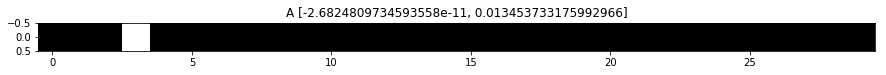

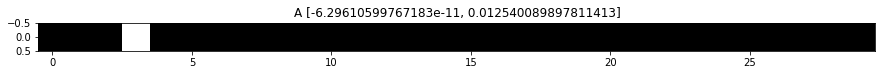

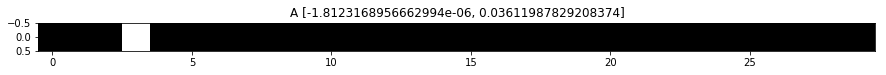

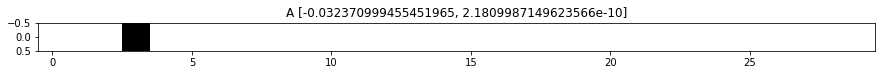

In [135]:
import torch
from torch import nn
import torch.nn.functional as F
import pdb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import random
%matplotlib inline

from scipy.stats import norm

figsize=(15,5)
def imshow(title, image, vmin=None, vmax=None):
  plt.figure(figsize=figsize)
  t = "{2} [{0}, {1}]".format(image.min(), image.max(), title)
  plt.title(t)
  if len(image.shape) == 2:
    plt.imshow(image.numpy(), cmap='gray', vmin=vmin, vmax=vmax)
  elif len(image.shape) == 1:
    plt.imshow([image.numpy()], cmap='gray', vmin=vmin, vmax=vmax)
  plt.show()

def inverted_hat(n, i):
    d = NormalDistributionCollection.normal_distribution(n, i * 1.0 / n, 0.07) - NormalDistributionCollection.normal_distribution(n, i * 1.0 / n, 0.1)
    d = d / (d.max() - d.min())
    d[i] = 0
    return d

n = 30
alpha = 0.1
mus = torch.tensor([[-0.1, 0, +0.1], [0.2, 0.2, 0.2], [0.9, 0.8, 0.7], [-0.6, -0.6, -0.6]])
input_width = mus.shape[1]
epochs = 5000
W = torch.stack([inverted_hat(n, i) for i in np.arange(n)])
W[0:input_width, 0:input_width] = 0
imshow("W", W)
handicap = torch.ones(n) * 0.5

for epoch in np.arange(epochs):
    As = []

    mus_randomized = mus.clone() + (torch.rand(mus.shape) - 0.5) * 0.1
    for mu in mus_randomized:
        A = torch.zeros(n)
        A[0:mu.shape[0]] = A[0:mu.shape[0]] + mu

        for iter in np.arange(1):
            #print("A ", A)
            #print("W ", W)
            C = A * W
            #print("C ", C)
            A = C.sum(dim=1)
        
        A = A * handicap

        A = torch.tanh(A)
        As.append(A)

        winner_index = A.max(0)[1]
        A = torch.zeros(n) * -1
        A[winner_index] = 1
        
        handicap += (1-handicap)/10
        handicap[winner_index] *= 0.7
        #handicap = torch.tanh(handicap)

        #print("A ", A)
        dW = torch.mul(C, A.unsqueeze(dim=1))
        #print("dW ", dW)
        W = torch.tanh(W + alpha * dW)
        #W[W<0.01] = 0.1
        #print("W ", W)

    
    if (epoch-1) % int(epochs/5) == 0:
        print("epoch ", epoch)
        imshow("W", W)
        imshow("handicap", handicap)
        for A in As:
            imshow("A", A)

tensor([-0.0000, -0.0001, -0.0006, -0.0036, -0.0180, -0.0681, -0.1825, -0.2967,
        -0.1503,  0.3682,  0.0000,  0.3682, -0.1503, -0.2967, -0.1825, -0.0681,
        -0.0180, -0.0036, -0.0006, -0.0001])


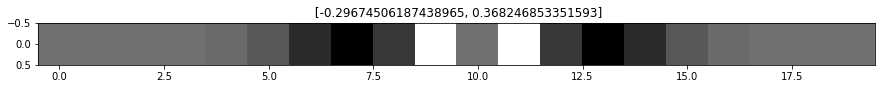